In [1]:
import numpy as np
import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
from matplotlib import ticker

plt.rc("text", usetex = True)
plt.rc("font", family = "serif")

# <span style = 'color:green'> FACTORES DE CONVERSIÓN
  Unidades CGS

In [2]:
#Densidad
densi = 1.7e-27
press = 1.5e-6
b_mag = 4.3
time  = 1.0e8
power = 4.40709e41

In [3]:
#FRACCIÓN DE ELECTRONES 0.0001
fname1  = "FExm-002.zl"
fname2  = "FExm002.zl"
fname3  = "FExm00.zl"
fname4  = "FExm-002.zl2"
fname5  = "FExm002.zl2"
fname6  = "FExm00.zl2"
#fname7  = "pressure0.zl2"
#fname8  = "pressure1.zl2"

data_set1 =pd.read_csv(fname1, sep='[\s]{2,}' ,header = None, engine = 'python')
data_set2 =pd.read_csv(fname2, sep='[\s]{2,}' ,header = None, engine = 'python')
data_set3 =pd.read_csv(fname3, sep='[\s]{2,}' ,header = None, engine = 'python')
data_set4 =pd.read_csv(fname4, sep='[\s]{2,}' ,header = None, engine = 'python')
data_set5 =pd.read_csv(fname5, sep='[\s]{2,}' ,header = None, engine = 'python')
data_set6 =pd.read_csv(fname6, sep='[\s]{2,}' ,header = None, engine = 'python')

#data_set7 =pd.read_csv(fname7, sep='[\s]{2,}' ,header = None, engine = 'python')
#data_set8 =pd.read_csv(fname8, sep='[\s]{2,}' ,header = None, engine = 'python')

In [4]:
# LORENTZ FACTOR
data_set1['v2'] = data_set1[2]**2 + data_set1[3]**2 + data_set1[4]**2
data_set2['v2'] = data_set2[2]**2 + data_set2[3]**2 + data_set2[4]**2
data_set3['v2'] = data_set3[2]**2 + data_set3[3]**2 + data_set3[4]**2

LF1 = 1/np.sqrt(1 -data_set1['v2'] )
LF2 = 1/np.sqrt(1 -data_set2['v2'] )
LF3 = 1/np.sqrt(1 -data_set3['v2'] )

(1.45, 2.1)

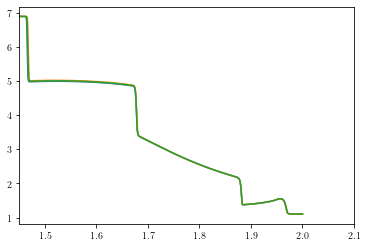

In [5]:
plt.plot(data_set1[0], LF1)
plt.plot(data_set2[0], LF2)
plt.plot(data_set3[0], LF3)
plt.xlim(1.45, 2.1)

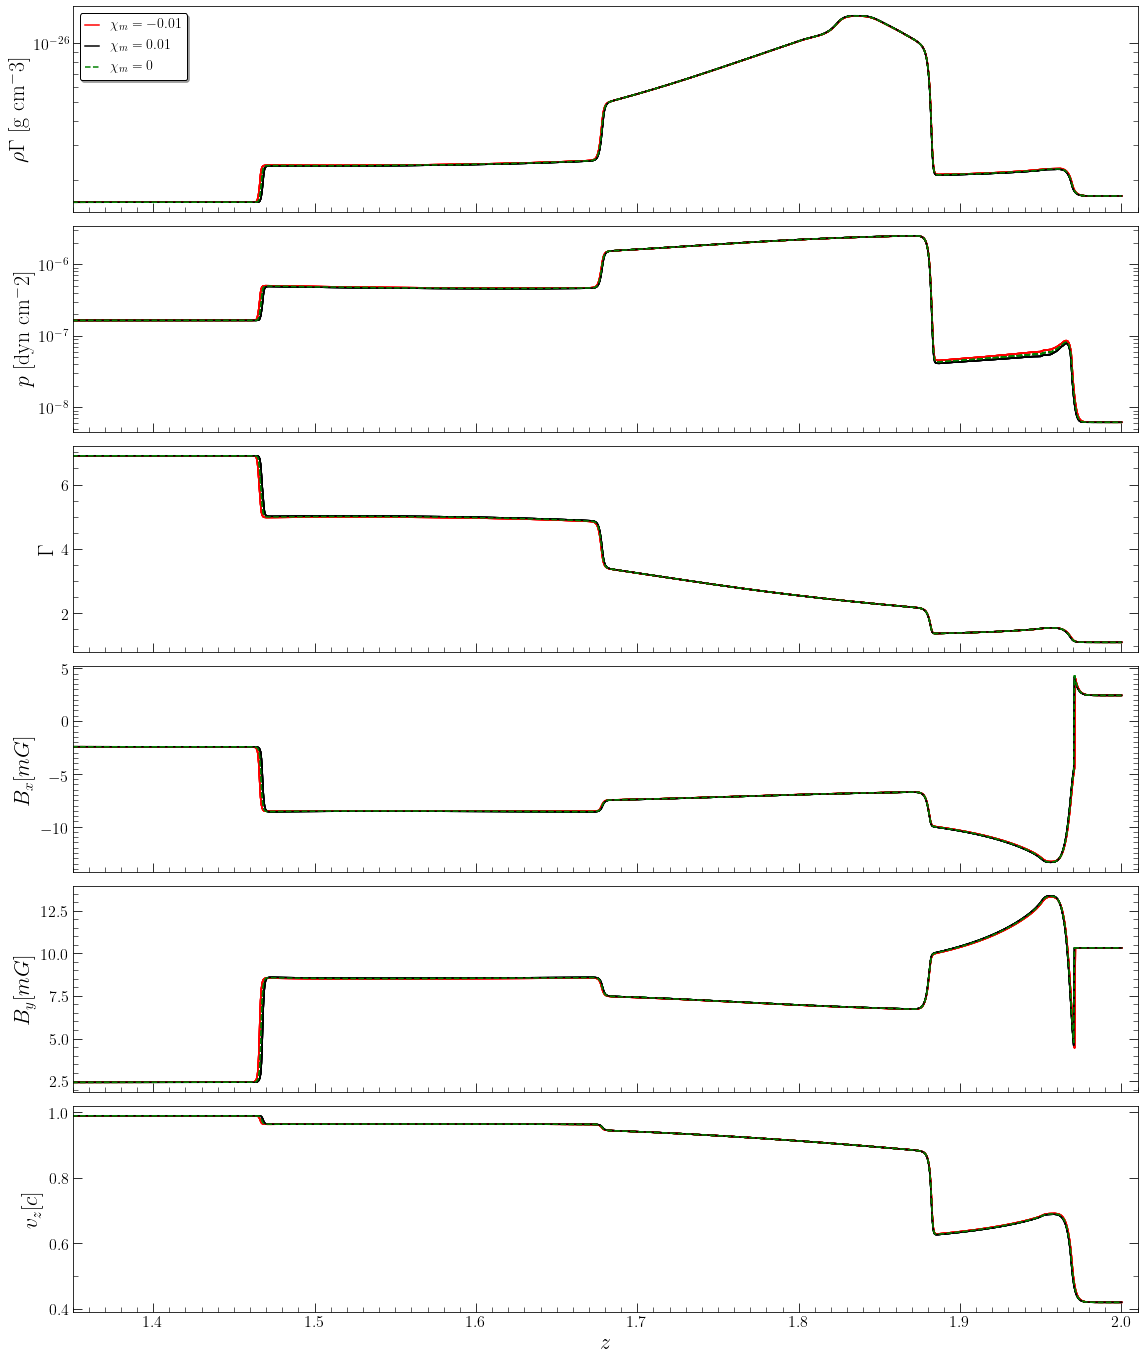

In [8]:
nrows=6
ncols=1
fs = 22
ps = -415
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (16,19)) #1 
#COLORS
colores = {}
#colors = ['r-', 'black', 'g--']
col1 = 'r-'
col2 = 'black'
col3 = 'g--'
for i in range(1, nrows+1):
    for j in range (1,4):
        name    = 'data_set' + str(j)
        name2   = 'data_set' + str(j+3)
        LF      = 'LF' + str(j)
        color   =  'col' + str(j)
        ax[0].plot(eval(name) [0], eval(name) [1]*densi, eval(color) )
        #ax[0].plot(eval(name) [0], eval(name) [1]*densi* eval(LF), eval(color) )
        ax[1].plot(eval(name2)[0], eval(name2)[1]*press          , eval(color) )        
        ax[2].plot(eval(name) [0], eval(LF)                      , eval(color) )       
    
        ax[3].plot(eval(name)[0], eval(name)[6]*b_mag, eval(color))
        ax[4].plot(eval(name)[0], eval(name)[7]*b_mag, eval(color))
        ax[5].plot(eval(name)[0], eval(name)[4]      , eval(color))
        
        ax[i-1].set_xlim(1.35, 2.01)
        ax[i-1].yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        ax[i-1].yaxis.set_tick_params(right='on',which='both')

for i in range (0, nrows):
        #ax[i].set_xticklabels([])
        ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
        ax[i].tick_params(axis='both', which='major', labelsize=16,length=9,direction='in')
        ax[i].tick_params(axis='both', which='minor', labelsize=16,length=5,direction='in')
        
#ZOOM
#ax_new = fig.add_axes([0.22, 0.92, 0.2, 0.05])
#ax_new.plot(data_set1[0], data_set1[1]*densi, 'r-') #Diamagnético
#ax_new.plot(data_set2[0], data_set2[1]*densi, 'black') #Paramagnético
#ax_new.plot(data_set3[0], data_set3[1]*densi, 'g--') #No polarizado
#ax_new.set_xlim(1.45, 1.7)
#ax_new.set_ylim(9e-28, 1e-26)
#ax_new.set_yscale('log')       
##ax_new.set_xticklabels([])
#ax_new.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#ax_new.tick_params(axis='both', which='major', labelsize=16,length=9,direction='in')
#ax_new.tick_params(axis='both', which='minor', labelsize=16,length=5,direction='in')
        


#SCALES AND LABELS
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.subplots_adjust(wspace = 0.2, hspace=0)

ax[0].set_ylabel(r'$\rho \Gamma $ [g cm$^-3$]', fontsize=fs)
ax[1].set_ylabel(r'$p$ [dyn cm$^-2$]'         , fontsize=fs)
ax[2].set_ylabel(r'$\Gamma$'                  , fontsize=fs)
ax[3].set_ylabel(r'$B_{x}[mG]$'                , fontsize=fs)
ax[4].set_ylabel(r'$B_{y}[mG]$'                , fontsize=fs)
ax[5].set_ylabel(r'$v_{z}[c]$'                , fontsize=fs) 
ax[5].set_xlabel(r'$z$'                       , fontsize=fs)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
ax[3].set_xticklabels([])
ax[4].set_xticklabels([])

ax[0].legend(
          ['$\chi_m = -0.01$', '$\chi_m = 0.01$', '$\chi_m = 0$'], loc = "upper left",
          frameon= True, handlelength = True, fontsize = 14,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 

plt.tight_layout()
plt.savefig('NE_FE.pdf',dpi=1000)

# <span style = 'color:green'> DENSIDAD

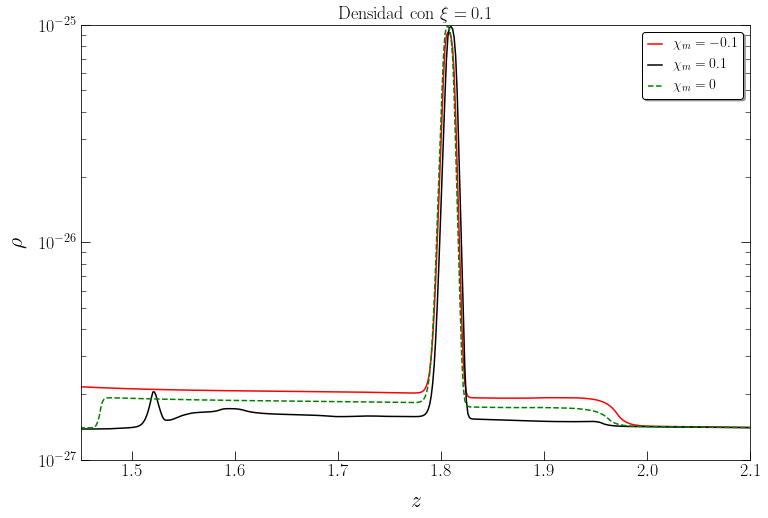

In [130]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_title(r'Densidad con $\xi = 0.1$', fontsize = 18)
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$\rho$', fontsize=22, labelpad = 12)
ax.set_yscale('log')
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set1[0], data_set1[1]*densi, 'r-') #Diamagnético
ax.plot(data_set2[0], data_set2[1]*densi, 'black') #Paramagnético
ax.plot(data_set3[0], data_set3[1]*densi, 'g--') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
ax.set_ylim([1e-27, 1e-25])
ax.set_xlim(1.45, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
ax.yaxis.set_tick_params(right='on',which='both')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#-----------------------------------------------------------------------------
 
#LEGENDAS
ax.legend(
          ['$\chi_m = -0.1$', '$\chi_m = 0.1$', '$\chi_m = 0$'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#-----------------------------------------------------------------------------
#plt.savefig('Densidad1.png',dpi=100)

# <span style = 'color:green'> VELOCIDAD EN x

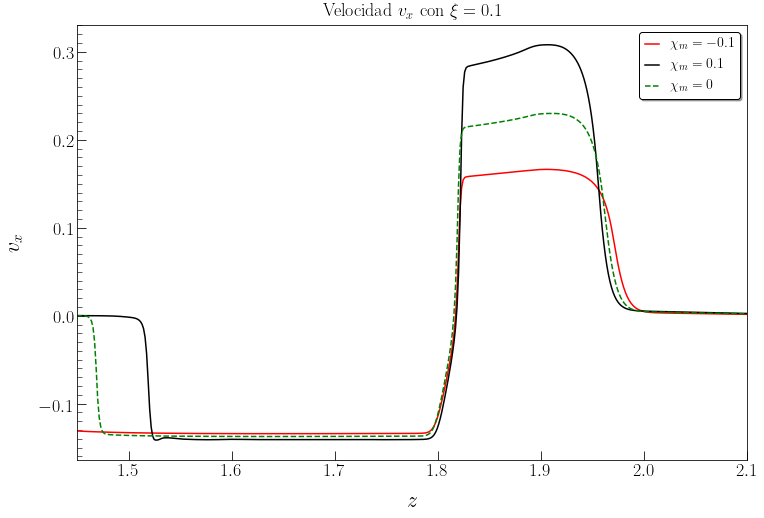

In [45]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_title(r'Velocidad $v_{x}$ con $\xi = 0.1$', fontsize = 18)
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$v_{x}$', fontsize=22, labelpad = 12)
#ax.set_yscale('log')
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set1[0], data_set1[2], 'r-') #Diamagnético
ax.plot(data_set2[0], data_set2[2], 'black') #Paramagnético
ax.plot(data_set3[0], data_set3[2], 'g--') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
#ax.set_ylim([1e-27, 1e-25])
ax.set_xlim(1.45, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
#ax.yaxis.set_tick_params(right='on',which='both')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#-----------------------------------------------------------------------------
 
#LEGENDAS
ax.legend(
          ['$\chi_m = -0.1$', '$\chi_m = 0.1$', '$\chi_m = 0$'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#-----------------------------------------------------------------------------
plt.savefig('Velx1.png',dpi=100)

# <span style = 'color:green'> VELOCIDAD EN y

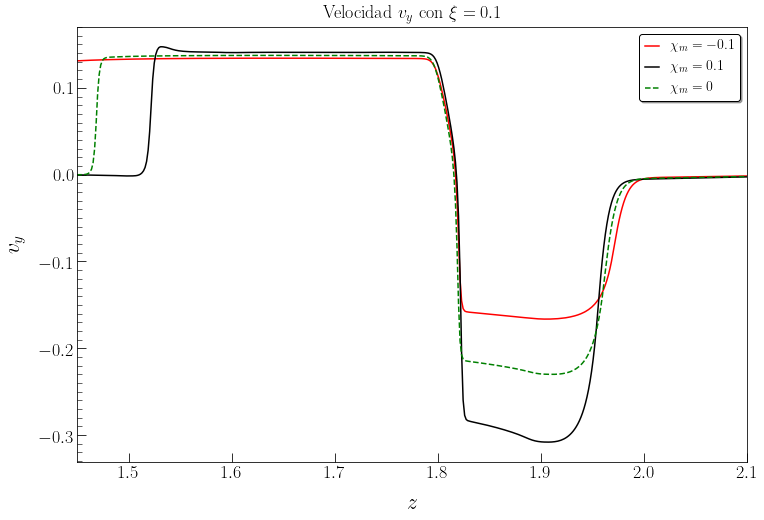

In [46]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_title(r'Velocidad $v_{y}$ con $\xi = 0.1$', fontsize = 18)
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$v_{y}$', fontsize=22, labelpad = 12)
#ax.set_yscale('log')
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set1[0], data_set1[3], 'r-') #Diamagnético
ax.plot(data_set2[0], data_set2[3], 'black') #Paramagnético
ax.plot(data_set3[0], data_set3[3], 'g--') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
#ax.set_ylim([1e-27, 1e-25])
ax.set_xlim(1.45, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
#ax.yaxis.set_tick_params(right='on',which='both')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#-----------------------------------------------------------------------------
 
#LEGENDAS
ax.legend(
          ['$\chi_m = -0.1$', '$\chi_m = 0.1$', '$\chi_m = 0$'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#-----------------------------------------------------------------------------
plt.savefig('Vely1.png',dpi=100)

# <span style = 'color:green'> VELOCIDAD EN z

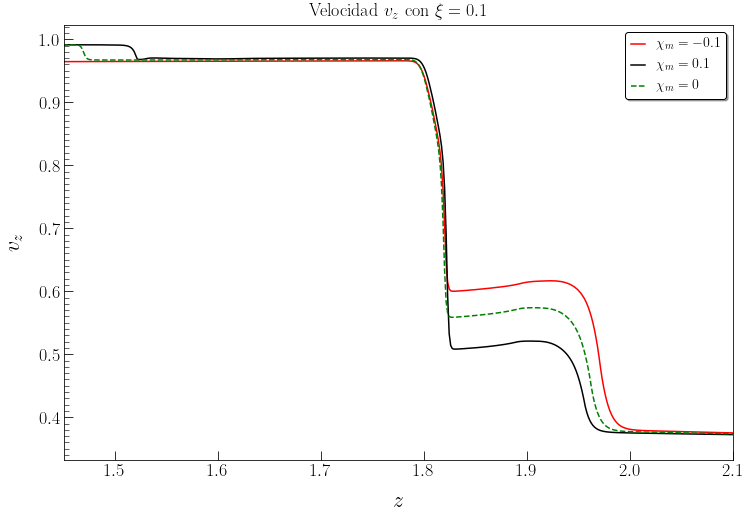

In [47]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_title(r'Velocidad $v_{z}$ con $\xi = 0.1$', fontsize = 18)
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$v_{z}$', fontsize=22, labelpad = 12)
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set1[0], data_set1[4], 'r-') #Diamagnético
ax.plot(data_set2[0], data_set2[4], 'black') #Paramagnético
ax.plot(data_set3[0], data_set3[4], 'g--') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
#ax.set_ylim([1e-27, 1e-25])
ax.set_xlim(1.45, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#-----------------------------------------------------------------------------
 
#LEGENDAS
ax.legend(
          ['$\chi_m = -0.1$', '$\chi_m = 0.1$', '$\chi_m = 0$'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#-----------------------------------------------------------------------------
plt.savefig('Velz1.png',dpi=100)

# <span style = 'color:green'> Presión

(-4.8857048765516807e-08, 1.025998354075851e-06)

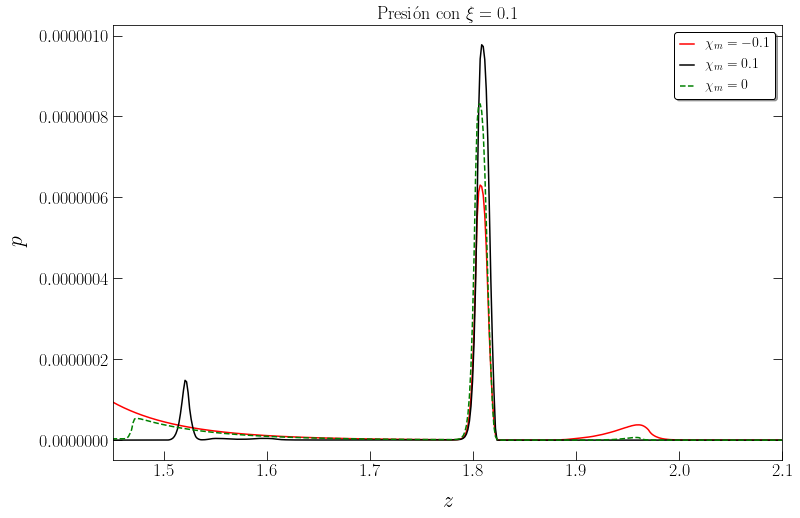

In [134]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_title(r'Presión con $\xi = 0.1$', fontsize = 18)
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$p$', fontsize=22, labelpad = 12)
#ax.set_yscale('log')
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set4[0], data_set4[1]*press, 'r-') #Diamagnético
ax.plot(data_set5[0], data_set5[1]*press, 'black') #Paramagnético
ax.plot(data_set6[0], data_set6[1]*press, 'g--') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
#ax.set_ylim([1e-28, 1e-05])
ax.set_xlim(1.45, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
ax.yaxis.set_tick_params(right='on',which='both')
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#-----------------------------------------------------------------------------
 
#LEGENDAS
ax.legend(
          ['$\chi_m = -0.1$', '$\chi_m = 0.1$', '$\chi_m = 0$'], loc = "best",
          frameon= True, handlelength = True, fontsize = fs,
          shadow = True,facecolor = "white", edgecolor = 'Black'
                ) 
#-----------------------------------------------------------------------------
ax.get_ylim()
#plt.savefig('Press1.png',dpi=100)

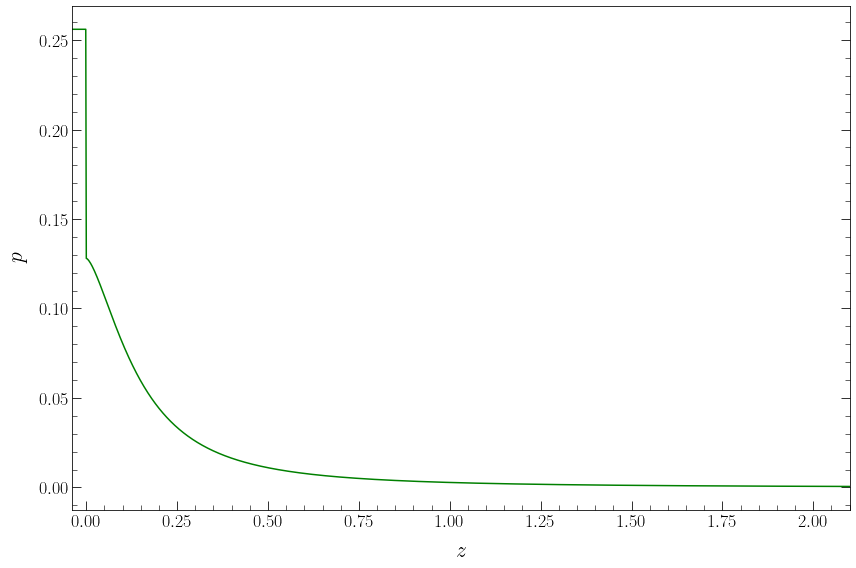

In [20]:
nrows=1
ncols=1
fs = 14
ps = 12
fig, ax = plt.subplots(nrows, ncols, sharex = False, sharey = False, figsize = (12,8))

#TÍTULO Y LABELS
ax.set_xlabel(r'$z$', fontsize=22, labelpad = 12)
ax.set_ylabel(r'$p$', fontsize=22, labelpad = 12)
#ax.set_yscale('log')
#-----------------------------------------------------------------------------

#VARIABLES A GRAFICAR
ax.plot(data_set8[0], data_set8[1], 'g-') #No polarizado
#-----------------------------------------------------------------------------

#LÍMITE DE LOS EJES
#ax.get_ylim()
#ax.set_ylim([1e-28, 1e-05])
ax.set_xlim(-0.04, 2.1)
#-----------------------------------------------------------------------------

#TICKS DE LOS EJES
ax.tick_params(axis='both', which='major', labelsize=18,length=9,direction='in')
ax.tick_params(axis='both', which='minor', labelsize=18,length=5,direction='in')
ax.yaxis.set_tick_params(right='on',which='both')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
#-----------------------------------------------------------------------------
 
#LEGENDAS
#ax.legend(
#          ['$ =  -0.0$'], loc = "best",
#          frameon= True, handlelength = True, fontsize = fs,
#          shadow = True,facecolor = "white", edgecolor = 'Black'
#                ) 
#-----------------------------------------------------------------------------
#ax.get_ylim()
plt.tight_layout()
plt.savefig('Press1.png',dpi=100)